In [139]:
import numpy as np
from networkx.algorithms.community import LFR_benchmark_graph

import matplotlib.pyplot as plt
%matplotlib inline

In [35]:
n = 1000
tau1 = 2
tau2 = 1.05
mu = 0.1
G = LFR_benchmark_graph(n, tau1, tau2, mu, average_degree=5,min_community=50, seed=11, max_iters=100)

In [36]:
communities = {frozenset(G.nodes[v]['community']) for v in G}
print(communities)

{frozenset({643, 772, 900, 7, 903, 10, 11, 524, 782, 278, 24, 282, 539, 542, 31, 32, 30, 807, 39, 554, 171, 940, 47, 49, 564, 822, 56, 952, 316, 76, 77, 80, 507, 854, 470, 215, 727, 730, 859, 220, 738, 355, 226, 228, 741, 359, 617, 491, 877, 366, 749, 240, 241, 760, 763, 503, 504, 761, 635, 252, 253, 511}), frozenset({4, 522, 18, 532, 21, 536, 25, 538, 287, 806, 41, 557, 48, 563, 317, 321, 322, 73, 79, 596, 88, 606, 96, 97, 614, 105, 116, 632, 889, 634, 124, 126, 638, 642, 645, 134, 902, 911, 409, 922, 411, 413, 672, 931, 421, 939, 941, 430, 943, 179, 438, 440, 185, 955, 443, 196, 965, 968, 459, 717, 719, 975, 981, 472, 475, 476, 990, 485, 744, 489, 236, 509, 767}), frozenset({512, 1, 2, 0, 774, 6, 521, 13, 273, 274, 785, 281, 286, 802, 37, 167, 45, 301, 560, 311, 568, 58, 571, 61, 573, 447, 832, 576, 703, 324, 837, 582, 198, 329, 972, 78, 593, 721, 978, 85, 94, 222, 479, 994, 996, 869, 486, 230, 742, 747, 237, 111, 367, 883, 246, 380, 249, 636}), frozenset({896, 641, 897, 644, 132, 51

In [37]:
len(communities)

11

In [38]:
import networkx as nx

In [39]:
g_array = nx.to_numpy_array(G)

In [40]:
np.set_printoptions(threshold=100)

In [41]:
g_array

array([[0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [42]:
np.random.rand()

0.17525305843502648

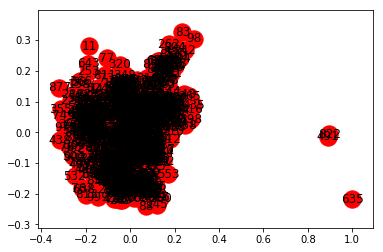

In [43]:
nx.draw_networkx(G)

In [44]:
G = np.zeros((500, 500))

In [14]:
for i in range(500):
    for j in range(i, 500):
        if j <= i+10:
            if np.random.rand() < 3/10:
                G[i][j] = np.random.randn()
                G[j][i] = np.random.randn()
        else:
            if np.random.rand() < 3/490:
                G[i][j] = np.random.randn()
                G[j][i] = np.random.randn()

In [15]:
G=nx.from_numpy_matrix(G)

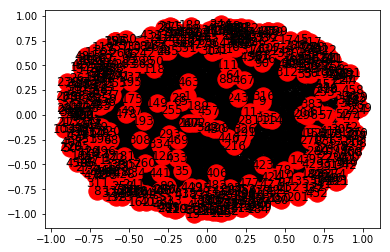

In [16]:
nx.draw_networkx(G)

In [17]:
def make_modular_network(N, average_degree, community_number, mu):
    assert N % community_number == 0, 'N must be devisible by community_number'
    G = np.zeros((N, N))
    for i in range(N):
        for j in range(i, N):
            if j <= i+(N/community_number):
                if np.random.rand() < average_degree*(1-mu)/(N/community_number):
                    G[i][j] = np.random.randn()
                    G[j][i] = np.random.randn()
            else:
                if np.random.rand() < average_degree*(mu)/(N-(N/community_number)):
                    G[i][j] = np.random.randn()
                    G[j][i] = np.random.randn()
    return G

In [18]:
G_array = make_modular_network(50, 5, 25, 0.1)

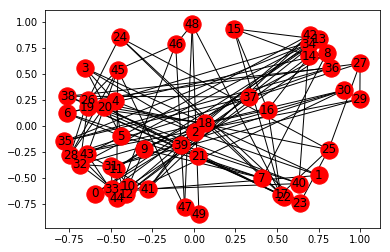

In [19]:
G=nx.from_numpy_matrix(G_array)
nx.draw_networkx(G)

In [20]:
def make_layered_network(N, average_degree, community_number, mu):
    assert N % community_number == 0, 'N must be devisible by community_number'
    size = N/community_number
    G = np.zeros((N, N))
    for i in range(N):
        com_index = i//size
        k_in_prev = 0
        k_out_prev = 0
        for j in range(int(size*com_index)):
            if G[i][j] != 0:
                k_out_prev += 1
        for j in range(int(size*com_index), int(size*(com_index+1))):
            if G[i][j] != 0:
                k_in_prev += 1
        for j in range(i, N):
            if j < size*((i//size)+1):
                if int(com_index) == 0 or int(com_index) == community_number-1:
                    if np.random.rand() < (average_degree*(1-(mu*0.5))-k_in_prev)/(size-(i-(size*com_index))+1):
                        G[i][j] = 1
                        G[j][i] = 1
                else:
                    if np.random.rand() < (average_degree*(1-mu)-k_in_prev)/(size-(i-(size*com_index))+1):
                        G[i][j] = 1
                        G[j][i] = 1
            elif j < size*((i//size)+2):
                if int(com_index) == 0 or int(com_index) == community_number-1:
                    if np.random.rand() < (average_degree*(mu*0.5)-k_out_prev)/size:
                        G[i][j] = 1
                        G[j][i] = 1
                else:
                    if np.random.rand() < (average_degree*(mu)-k_out_prev)/size:
                        G[i][j] = 1
                        G[j][i] = 1
                    
    return G

In [79]:
def make_modular_network(N, average_degree, community_number, mu):
    assert N % community_number == 0, 'N must be devisible by community_number'
    G = np.zeros((N, N))
    size = N/community_number
    for i in range(N):
        com_index = i//size
        k_in_prev = 0
        k_out_prev = 0
        for j in range(int(size*com_index)):
            if G[i][j] != 0:
                k_out_prev += 1
        for j in range(int(size*com_index), int(size*(com_index+1))):
            if G[i][j] != 0:
                k_in_prev += 1
        for j in range(i, N):
            if j < size*((i//size)+1):
                if np.random.rand() < (average_degree*(1-mu)-k_in_prev)/(size-(i-(size*com_index))+1):
                    G[i][j] = 1
                    G[j][i] = 1
            else:
                if np.random.rand() < (average_degree*(mu)-k_out_prev)/(N-(size*((i//size)+1))+1):
                    G[i][j] = 1
                    G[j][i] = 1
    return G

In [145]:
G_array = make_modular_network(200, 10, 4, 0.05)
G=nx.from_numpy_matrix(G_array)

In [131]:
G.degree()

DegreeView({0: 23, 1: 16, 2: 18, 3: 24, 4: 24, 5: 19, 6: 16, 7: 24, 8: 22, 9: 19, 10: 17, 11: 19, 12: 13, 13: 22, 14: 15, 15: 28, 16: 19, 17: 22, 18: 19, 19: 23, 20: 23, 21: 21, 22: 21, 23: 13, 24: 22, 25: 22, 26: 19, 27: 20, 28: 20, 29: 23, 30: 19, 31: 20, 32: 19, 33: 17, 34: 20, 35: 21, 36: 23, 37: 19, 38: 19, 39: 20, 40: 21, 41: 19, 42: 23, 43: 28, 44: 20, 45: 21, 46: 20, 47: 19, 48: 23, 49: 21, 50: 13, 51: 21, 52: 14, 53: 17, 54: 18, 55: 17, 56: 14, 57: 21, 58: 19, 59: 19, 60: 21, 61: 19, 62: 20, 63: 17, 64: 20, 65: 26, 66: 21, 67: 20, 68: 24, 69: 20, 70: 25, 71: 21, 72: 18, 73: 18, 74: 16, 75: 16, 76: 20, 77: 20, 78: 16, 79: 17, 80: 27, 81: 19, 82: 17, 83: 25, 84: 17, 85: 19, 86: 20, 87: 20, 88: 19, 89: 22, 90: 20, 91: 21, 92: 23, 93: 19, 94: 16, 95: 21, 96: 20, 97: 20, 98: 20, 99: 22, 100: 18, 101: 18, 102: 21, 103: 15, 104: 26, 105: 21, 106: 20, 107: 14, 108: 24, 109: 15, 110: 19, 111: 13, 112: 17, 113: 17, 114: 16, 115: 20, 116: 20, 117: 20, 118: 30, 119: 25, 120: 18, 121: 24, 

In [132]:
degree_sequence = sorted([d for n, d in G.degree()], reverse=True)

In [133]:
print(degree_sequence)

[30, 28, 28, 27, 26, 26, 26, 26, 26, 26, 26, 25, 25, 25, 25, 25, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 16, 16, 16, 16, 16, 16, 16, 16, 15, 15, 15, 15, 14, 14, 14, 13, 13, 13, 13, 12]


In [134]:
np.mean(degree_sequence)

20.13

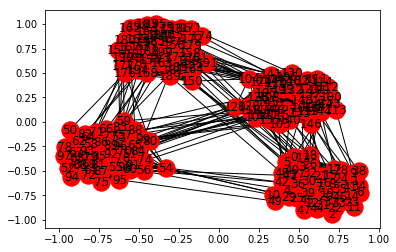

In [135]:
nx.draw_networkx(G)

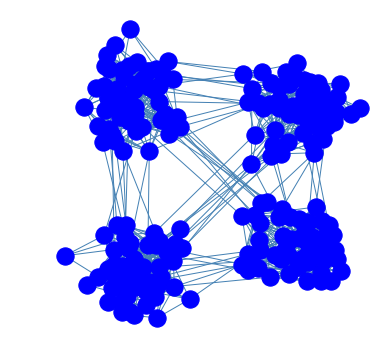

In [147]:

# レイアウトの取得
pos = nx.spring_layout(G)

# 可視化
plt.figure(figsize=(6, 6))
nx.draw_networkx_edges(G, pos, edge_color="steelblue")
nx.draw_networkx_nodes(G, pos, node_color="blue")
plt.axis('off')
plt.savefig('normal_modularity.png', dpi=300)

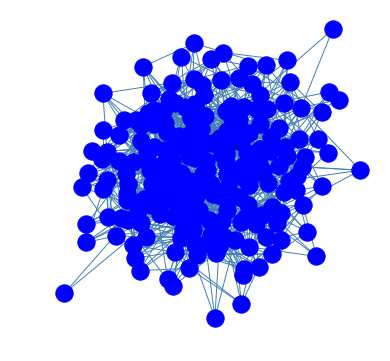

In [155]:
N_NODES = 200
W = np.ones((N_NODES*N_NODES))
tmp = np.random.choice(N_NODES**2, 1000, replace=False)
mask = [False if i in tmp else True for i in range(N_NODES**2)]
mask = np.array(mask)
W[mask] = 0
W = W.reshape(N_NODES, N_NODES)
radius = np.max(np.abs(np.linalg.eigvals(W)))

G=nx.from_numpy_matrix(W)
pos = nx.spring_layout(G)

# 可視化
plt.figure(figsize=(6, 6))
nx.draw_networkx_edges(G, pos, edge_color="steelblue")
nx.draw_networkx_nodes(G, pos, node_color="blue")
plt.axis('off')
plt.savefig('normal_sparse.png', dpi=300)

In [157]:

def make_recurrent_layered_network(N, average_degree, community_number, mu):
    assert N % community_number == 0, 'N must be devisible by community_number'
    size = N / community_number
    G = np.zeros((N, N))
    for i in range(N):
        com_index = i // size
        k_in_prev = 0
        k_out_prev = 0
        for j in range(int(size * com_index)):
            if G[i][j] != 0:
                k_out_prev += 1
        for j in range(int(size * com_index), int(size * (com_index + 1))):
            if G[i][j] != 0:
                k_in_prev += 1
        for j in range(i, N):
            if j < size * ((i // size) + 1):
                if int(com_index) == 0 or int(com_index) == community_number - 1:
                    if np.random.rand() < (average_degree * (1 - (mu * 0.5)) - k_in_prev) / (
                            size - (i - (size * com_index)) + 1):
                        G[i][j] = 1
                        G[j][i] = 1
                else:
                    if np.random.rand() < (average_degree * (1 - mu) - k_in_prev) / (
                            size - (i - (size * com_index)) + 1):
                        G[i][j] = 1
                        G[j][i] = 1
            elif j < size * ((i // size) + 2):
                if int(com_index) == 0 or int(com_index) == community_number - 1:
                    if np.random.rand() < (average_degree * (mu * 0.5) - k_out_prev) / size:
                        G[i][j] = 1
                        G[j][i] = 1
                else:
                    if np.random.rand() < (average_degree * (mu) - k_out_prev) / size:
                        G[i][j] = 1
                        G[j][i] = 1

    return G

In [158]:
G_array = make_recurrent_layered_network(200, 10, 4, 0.05)
G=nx.from_numpy_matrix(G_array)

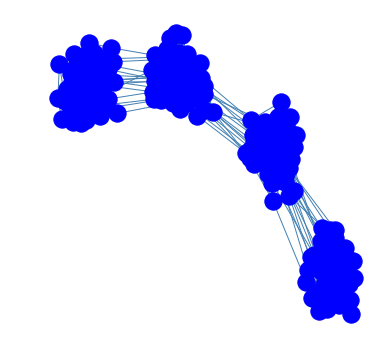

In [160]:

# レイアウトの取得
pos = nx.spring_layout(G)

# 可視化
plt.figure(figsize=(6, 6))
nx.draw_networkx_edges(G, pos, edge_color="steelblue")
nx.draw_networkx_nodes(G, pos, node_color="blue")
plt.axis('off')
plt.savefig('layered_network.png')

In [165]:
import seaborn as sns
# G_array = make_modular_network(200, 10, 4, 0.05)
plt.figure()
sns.heatmap(W)
plt.savefig('sparse.png', dpi=300)
plt.close('all')

In [112]:
nx.average_clustering(G)

0.10582957901602849

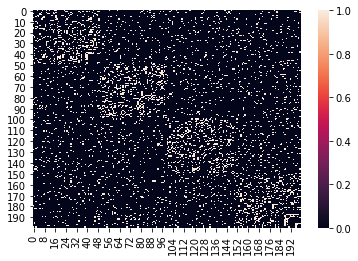

In [113]:
import seaborn as sns
sns.heatmap(G_array)

In [119]:
G_smallworld = nx.watts_strogatz_graph(128, k=16, p=0.01)
degree_sequence = sorted([d for n, d in G_smallworld.degree()], reverse=True)
print(degree_sequence)
print(np.mean(degree_sequence))

[18, 17, 17, 17, 17, 17, 17, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 15, 15, 15, 15, 15, 15, 15, 15]
16.0


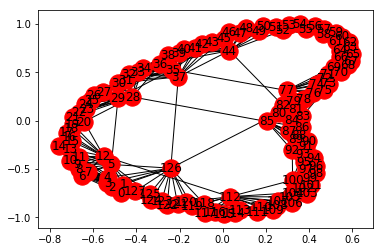

In [120]:
nx.draw_networkx(G_smallworld)

In [121]:
W = nx.to_numpy_array(G_smallworld)

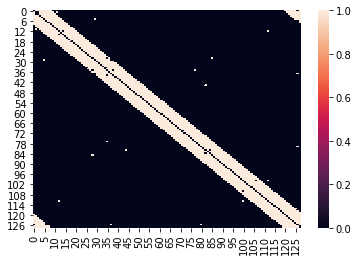

In [122]:
sns.heatmap(W)

In [123]:
J_strogatz_wattz = np.zeros((128,128))

In [ ]:
for i in range(128):
    for j in range()

In [118]:
nx.average_clustering(G_smallworld)

0.687001415149394

In [59]:
G_array = make_modular_network(128, 16, 4, 0.1)
G=nx.from_numpy_matrix(G_array)
degree_sequence = sorted([d for n, d in G.degree()], reverse=True)
print(degree_sequence)
print(np.mean(degree_sequence))

[23, 22, 22, 21, 21, 20, 20, 20, 20, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 12, 12, 12, 11]
16.203125


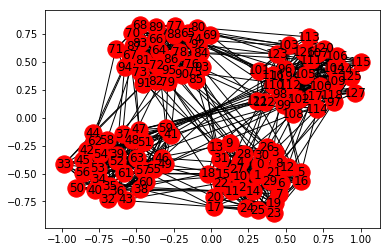

In [62]:
nx.draw_networkx(G)

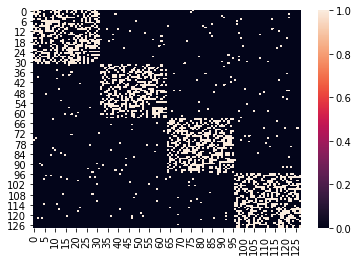

In [63]:
import seaborn as sns
sns.heatmap(G_array)